# Analyse des ventes d'une boutique en ligne

# Objectifs du projet :
1. Nettoyage des données :
  - Vérification des valeurs manquantes dans le dataset et correction si nécessaire.
2. Analyse exploratoire :
  - Produit le plus vendu 
  - Celui qui génère le plus de revenus 
  - Catégorie de produits la plus populaire 
  - Ville génèrant le plus de revenus pour la boutique 
3. Visualisation des données :
  - Création d'un graphique pour visualiser les revenus par catégorie de produits
  - Création d'un graphique pour montrer le volume des ventes par ville
4. Conclusion



In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### 1 : Affichage et Nettoyage des données

In [18]:
# Chargement du fichier CSV
df = pd.read_csv("online_retail_dataset.csv")

# Affichage des premières lignes pour vérifier
print(df.head())

# Résumé statistique
print("\nRésumé statistique :")
print(df.describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

  OrderID     Product     Category  Price  Quantity   OrderDate       City  \
0  ORD001      Laptop  Electronics   1000         1  2023-01-01      Paris   
1  ORD002  Smartphone  Electronics    700         2  2023-01-02       Lyon   
2  ORD003      Tablet  Electronics    300         1  2023-01-03  Marseille   
3  ORD004  Headphones  Accessories     50         3  2023-01-04   Toulouse   
4  ORD005  Smartwatch  Electronics    200         2  2023-01-05   Bordeaux   

  PaymentMethod  
0   Credit Card  
1        PayPal  
2   Credit Card  
3   Credit Card  
4        PayPal  

Résumé statistique :
             Price   Quantity
count    20.000000  20.000000
mean    199.000000   2.450000
std     253.546425   1.932411
min      10.000000   1.000000
25%      38.750000   1.000000
50%     110.000000   2.000000
75%     225.000000   3.000000
max    1000.000000   8.000000

Valeurs manquantes par colonne :
OrderID          0
Product          0
Category         0
Price            0
Quantity         0
Or

#### 2 : Analyse exploratoire

In [77]:
# Produit le plus vendu
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales = product_sales.sort_values(ascending=False)
print(product_sales)

most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

print(f"Produit le plus vendu : {most_sold_product} avec {most_sold_quantity} unités vendues.")


Product
USB Cable         8
Charger           6
Keyboard          5
Mouse             4
External HDD      3
Headphones        3
Speakers          2
Smartwatch        2
Smartphone        2
SSD               2
Router            2
Power Bank        2
Printer           1
Scanner           1
Monitor           1
Laptop            1
Tablet            1
Gaming Console    1
VR Headset        1
Webcam            1
Name: Quantity, dtype: int64
Produit le plus vendu : USB Cable avec 8 unités vendues.


In [67]:
# Calcul du revenu par produit
df['Revenue'] = df['Price'] * df['Quantity']
# Une nouvelle colonne Revenue a été ajoutée pour permettre une meilleure compréhension des performances financières.


# Regroupement par produit et somme des revenus
product_income = df.groupby('Product')['Revenue'].sum()

# Tri par revenu décroissant
sorted_product_income = product_income.sort_values(ascending=False)

# Produits triés par revenu
print("Produits triés par revenu généré :")
print(sorted_product_income)

# Produit qui génère le plus de revenus
top_product = sorted_product_income.idxmax()
top_revenue = sorted_product_income.max()

print(f"Le produit qui génère le plus de revenus est '{top_product}' avec un revenu total de {top_revenue:.2f} €.")



Produits triés par revenu généré :
Product
Smartphone        1400
Laptop            1000
Smartwatch         400
Gaming Console     400
VR Headset         350
Tablet             300
SSD                300
External HDD       270
Router             200
Headphones         150
Keyboard           150
Monitor            150
Scanner            150
Speakers           120
Charger            120
Printer            120
Mouse              100
USB Cable           80
Power Bank          70
Webcam              40
Name: Revenue, dtype: int64
Le produit qui génère le plus de revenus est 'Smartphone' avec un revenu total de 1400.00 €.


In [73]:
# Regroupement par catégorie et somme des quantités vendues
popular_category = df.groupby('Category')['Quantity'].sum()

# Tri des catégories par popularité décroissante
sorted_top_city = popular_category.sort_values(ascending=False)

# Catégories triées par quantité vendue
print("La ville qui génère le plus de revenus(basée sur la quantité totale vendue) :")
print(sorted_popular_category)

# Catégorie la plus populaire
top_category = sorted_popular_category.idxmax()
top_quantity = sorted_popular_category.max()

print(f"La catégorie de produit la plus populaire est '{top_category}' avec un total de {top_quantity} unités vendues.")


Catégorie de produit la plus populaire (basée sur la quantité totale vendue) :
Category
Accessories    31
Electronics    18
Name: Quantity, dtype: int64
La catégorie de produit la plus populaire est 'Accessories' avec un total de 31 unités vendues.


In [89]:
# Regroupement par ville et somme des revenus
top_city_income = df.groupby('City')['Revenue'].sum()

# Tri par revenu décroissant
top_city_income = top_city_income.sort_values(ascending=False)

# Ville triés par revenu généré
print("Produits triés par le revenu généré par ville:")
print(top_city_income)

# Ville qui génère le plus de revenus
top_city = top_city_income.idxmax()
top_revenue = top_city_income.max()

print(f"La ville qui génère le plus de revenus est '{top_product}' avec un revenu total de {top_revenue:.2f} €.")




Produits triés par le revenu généré par ville:
City
Lyon                1400
Paris               1000
Bordeaux             400
Orléans              400
Metz                 350
Marseille            300
Tours                300
Clermont-Ferrand     270
Saint-Étienne        200
Lille                150
Reims                150
Toulouse             150
Nantes               150
Le Havre             120
Rennes               120
Strasbourg           120
Nice                 100
Dijon                 80
Grenoble              70
Montpellier           40
Name: Revenue, dtype: int64
La ville qui génère le plus de revenus est 'Lyon' avec un revenu total de 1400.00 €.


#### 3 : Visualisations

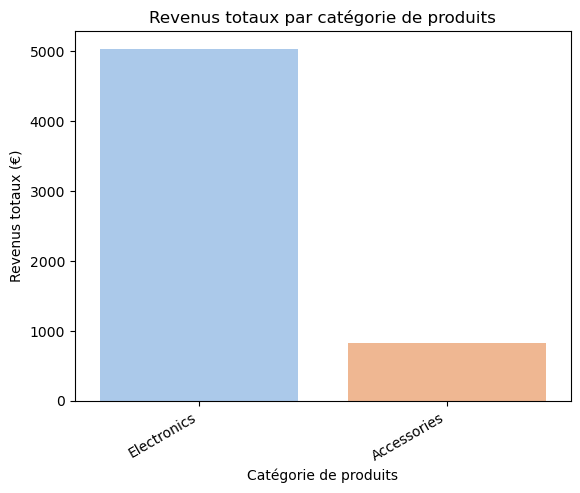

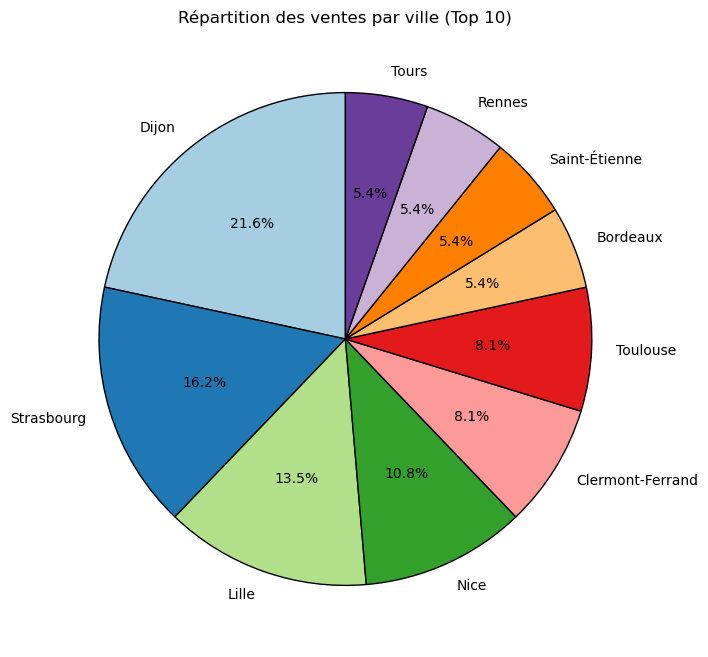

In [115]:
# Graphique des revenus par catégorie de produits
sns.barplot(
    data=df,
    x='Category',
    y='Revenue',
    hue='Category',
    palette='pastel',
    estimator=sum,  
    errorbar=None
)

plt.title('Revenus totaux par catégorie de produits')
plt.ylabel('Revenus totaux (€)')
plt.xlabel('Catégorie de produits')
plt.xticks(rotation=45) 
plt.xticks(rotation=30, ha='right')
plt.show()

# Graphique du volume des ventes par ville (Top 10)
top_city = df.groupby('City')['Quantity'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(8, 8))
plt.pie(
    top_city,
    labels=top_cities.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Répartition des ventes par ville (Top 10)')
plt.show()

## 4 : Conclusion

#### Analyses effectuées
+ Produit le plus vendu :
Le produit le plus vendu est le câble USB, avec 8 unités vendues, ce qui reflète une forte demande pour des articles d'usage courant.
+ Produit qui génère le plus de revenus :
Bien que le câble USB soit le plus vendu, le produit qui génère le plus de revenus est le smartphone, avec un revenu total de 1400 €, ce qui montre que des produits de valeur élevée contribuent davantage au chiffre d'affaires.
+ Catégorie de produits la plus populaire :
Les accessoires dominent en termes de quantité totale vendue, suivis des produits électroniques, soulignant une préférence des clients pour des articles complémentaires.
+ Ville générant le plus de revenus :
La ville de Lyon se démarque comme la plus rentable, générant 1400 € de revenus.

#### Visualisations
+ Les visualisations des revenus par catégorie et par ville ont révélé des disparités significatives, mettant en lumière les segments et les zones géographiques les plus rentables.
Une répartition circulaire a également permis de visualiser la contribution relative de chaque ville au chiffre d'affaires global.